# Lecture 8: Clustering (Unsupervised Classification)

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/) for the 2023/24 data science class at the Rudjer Boskovic Institute, and it is available from [github](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture8.ipynb).


Note: this notebook contains code developed by Z. Ivezic, M. Juric, A. Connolly, B. Sippocz, Jake VanderPlas, G. Richards and many others.


##### Resources for this notebook include:
- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 6.

<a id='toc'></a>
## This notebook includes:
 
[Introduction to Clustering](#intro)
- unsupervised vs. supervised classification
- 1-D hypothesis testing        

[K-means clustering algorithm](#kmeans)

[Clustering with Gaussian Mixture models (GMM)](#gmm)

[Hierarchical clustering algorithm](#hca)

## Introduction to Clustering <a id='intro'></a>
[Go to top](#toc)

### Clustering

“Clustering” in machine learning context refers to a number of different aspects of data analysis. Given a multivariate point data set, we can ask whether it displays any structure, that is, concentrations of points. Alternatively, when a density estimate is available (see Lecture 7), we can search for “overdensities”. Another way to interpret clustering is to seek a partitioning or segmentation of data into smaller parts according to some criteria. 


Here is an illustration of clustering in 2-D space (see Lecture 7 for details):

![](figures/2Dclustering.png)

### Unsupervised vs. Supervised Classification  

In density estimation, we estimate joint probability distributions from multivariate data sets to identify the inherent clustering. This is essentially **unsupervised classification**. Here “unsupervised” means that there is no prior information about the number and properties of clusters.
In other words, this method is search for unknown structure in your (multi-dimensional) dataset.

If we have labels for some of these data points (e.g., an object is tall, short, red, or blue), we can develop a relationship between the label and the properties of a source. This is **supervised classification**. In other words, this method is finding objects in 
your (multi-dimensional) dataset that "look like" objects in your training set. 

Classification, regression, and density estimation are all closely related. For example, the regression function $\hat{y} = f(y|\vec{x})$ is the best estimated value of $y$ given a value of $\vec{x}$. In classification $y$ is categorical and $f(y|\vec{x})$ is called the _discriminant function_
 

##  1-D hypothesis testing
[Go to top](#toc)

How do we decide about the existance of a cluster? Let's start with
the simplest but fundamental example: 1-D hypothesis testing.


### **Motivating question:** 

You just measured x = 3, with a negligible measurement error.

You know that you could have drawn this value from one of two possible populations (e.g. stars and galaxies). One population can be described as N(0,2), and the other one as N(4,1). 

Which population is more likely, given your x?  

###  Naive (wrong) answer: 

3 is closer to 4 (1 "sigma away") than to 0
(1.5 "sigma away") so the second population, N(4,1), is more likely.

#### Let's see why this answer is wrong...
 

![](figures/1Dht.png) 

![](figures/1Dht2.png) 

![](figures/1Dht3.png) 

![](figures/1Dht4.png) 

## K-means clustering algorithm <a id='kmeans'></a>


![](figures/Kmeans.png) 

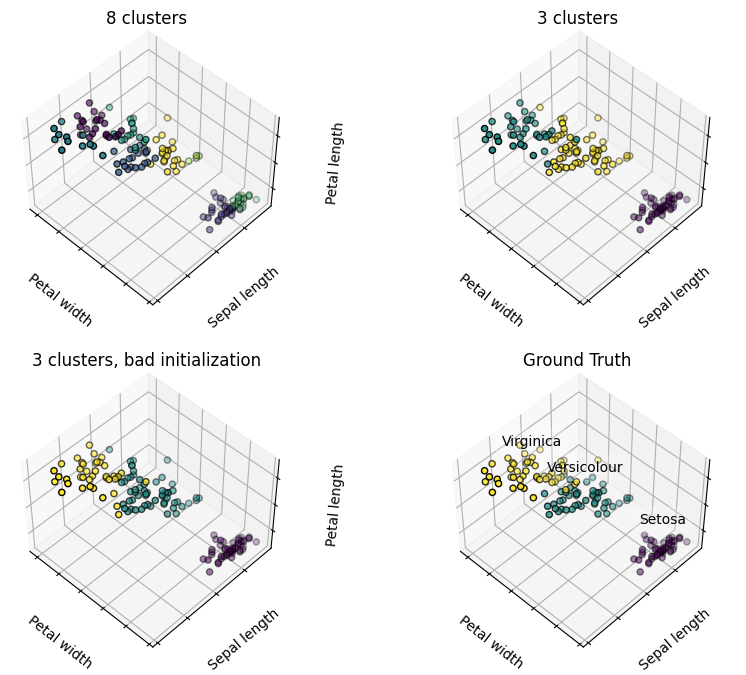

In [202]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# see
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

![](figures/Kmeans2.png) 

## There are many clustering methods! 
### see https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![](figures/ClusteringMethods.png) 

## Clustering with Gaussian Mixture models (GMM) <a id='gmm'></a>
[Go to top](#toc)

We already addressed Gaussian Mixture models in Lecture 7 about Density Estimation.

If the clusters can be, at least approximately, described as multi-variate Gaussians, then GMM can be very powerful clustering tool.

Let's first introduce hierarchical clustering algorithm and then we'll compare their
performance on a real data set.


## Hierarchical clustering algorithm <a id='hca'></a>
[Go to top](#toc)

![](figures/hc1.png) 

![](figures/hc2.png) 


### Let's now apply this method to a real dataset: clustering of asteroids in the space of orbital elements



## Clustering of orbital data for asteroids

Asteroids are clustered in orbital parameter space (6 dimensions
but here we will consider two: semi-major axis and inclination)
and these clusters, known as families, are believed to be remnants of larger asteroids destroyed in collisions. Typically, families have
uniform colors, for more details see [Parker et al. 2008.](
http://faculty.washington.edu/ivezic/Publications/parker.pdf)

Using the Parker et al. dataset, available from astroML, we will apply 
Gaussian Mixture Model and the Minimum Spanning Tree model and
compare their clustering results.



### For completeness, we expect structure like this:

![Parker et al. asteroid families](http://faculty.washington.edu/ivezic/sdssmoc/MOC4_population_labels.jpg) 

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.neighbors import KernelDensity

from astroML.clustering import HierarchicalClustering, get_graph_segments
from astroML.datasets import fetch_moving_objects

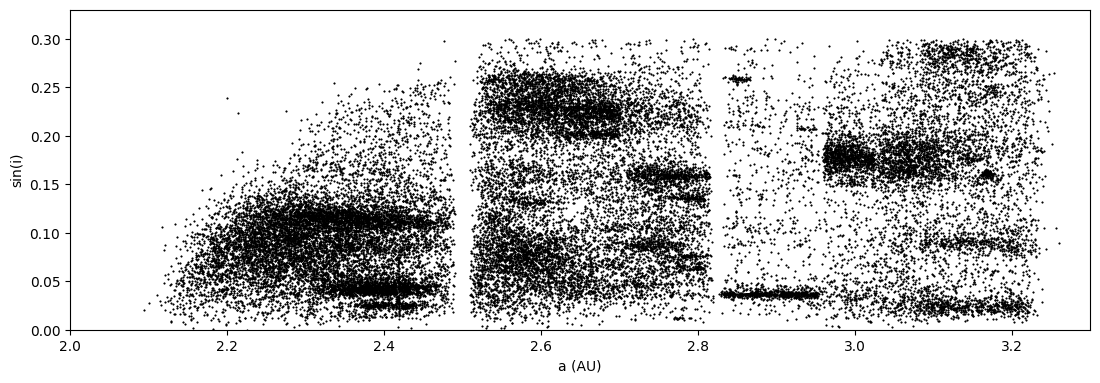

In [3]:
# Fetch data and extract the desired quantities
dataAll = fetch_moving_objects(Parker2008_cuts=True)
data = dataAll[1:]
a = data['aprime']
sini = data['sin_iprime']
acolor = data['mag_a']
izcolor = data['mag_i'] - data['mag_z']
X = np.vstack([a, sini]).T

#------------------------------------------------------------
# Plot 
xmin, xmax = (2.0, 3.3)
ymin, ymax = (0.0, 0.33)
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0, left=0.1, right=0.95, bottom=0.1, top=0.9)

ax = fig.add_subplot(311)
ax.scatter(X[:, 0], X[:, 1], s=1, lw=0.5, c='k')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('a (AU)')
ax.set_ylabel('sin(i)')

plt.show()

In [4]:
#------------------------------------------------------------
# Compute GMM models & AIC/BIC
N = np.arange(1, 60)
def compute_GMM(N, covariance_type='full', max_iter=100):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GMM(n_components=N[i], max_iter=max_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]
i_best = np.argmin(BIC)
gmm_best = models[i_best]

print("best fit converged:", gmm_best.converged_)
print("BIC: n_components =  %i" % N[i_best])

best fit converged: True
BIC: n_components =  43


In [5]:
# replaces draw_ellipse from astroML.plotting.tools 
from matplotlib.patches import Ellipse
def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                             (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse((mu[0], mu[1]),
                             2 * scale * sigma1, 2 * scale * sigma2,
                             alpha * 180. / np.pi,
                             **kwargs))

0 27 0.043867865731353366
1 31 0.043176149341660704
2 22 0.0416911996006166
3 37 0.03962698525929111
4 17 0.03933856478073513
5 0 0.03759041164945221
6 10 0.037164683949626645
7 15 0.03687563395604394
8 7 0.034515049446286715
9 25 0.0329621420492576
10 16 0.0326987494360199
11 38 0.030503870131029214
12 6 0.030392600837655433
13 36 0.029852664167909874
14 5 0.028177464198485942
15 9 0.027653201579002414
16 26 0.024601818482173663
17 11 0.024214164102623156
18 41 0.023661348318208705
19 14 0.023623755459693984
20 2 0.023040121056736355
21 35 0.02182799697678867
22 30 0.021043212934173248
23 28 0.020824813788816787
24 3 0.019206650806208016
25 12 0.01795497796611171
26 4 0.017859303071467283
27 13 0.017043578901529816
28 39 0.01685776542157191
29 40 0.01634493309953998
30 23 0.01573508591848364
31 34 0.015177687886514002
32 24 0.01515590405081197
33 18 0.014175736076281451
34 33 0.013362075316825234
35 20 0.013153177395892885
36 32 0.011346633389668844
37 29 0.0113207824825514
38 8 0.009

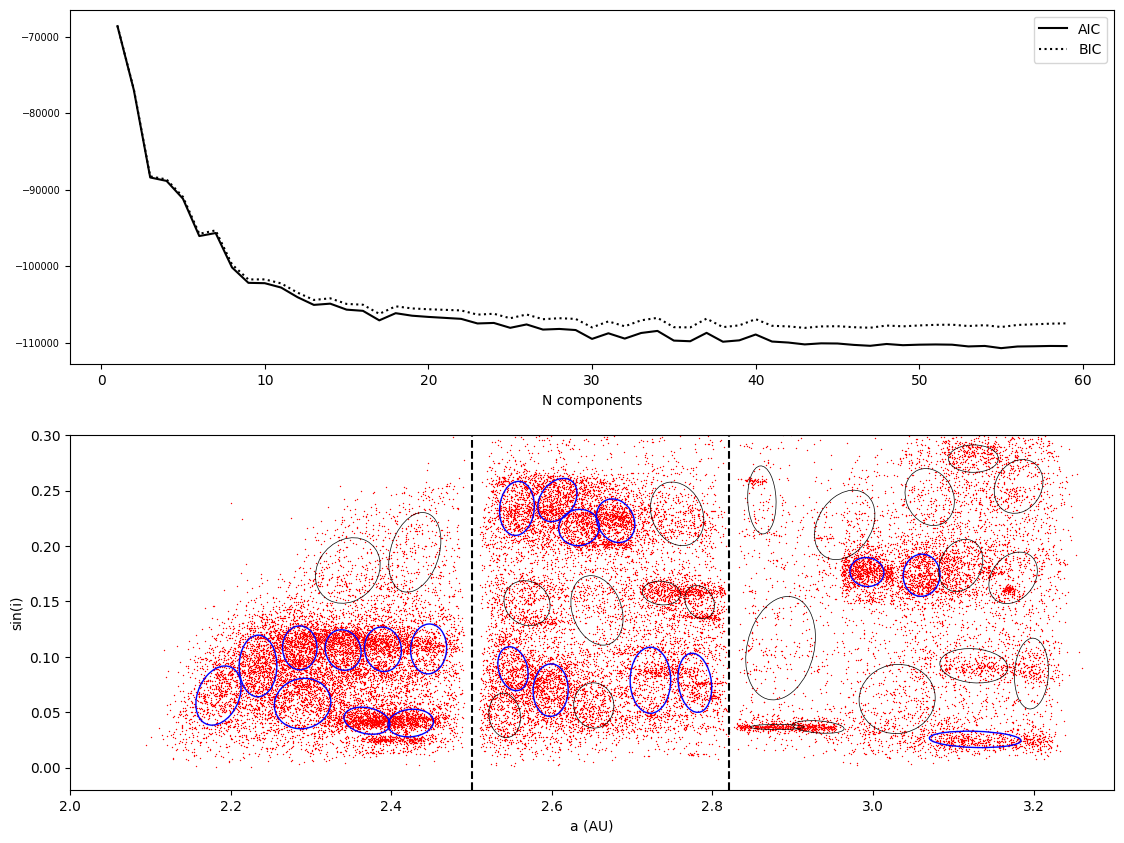

In [6]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.45, bottom=0.25, top=0.9, left=0.1, right=0.97)

# plot AIC/BIC
ax = fig.add_subplot(211)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, ':k', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=7)

# plot best configurations for AIC and BIC
ax = fig.add_subplot(212)

ax.scatter(a, sini, c='red', s=1, lw=0)

ind = np.argsort(gmm_best.weights_)[::-1]
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    print(cnt, i, w)
    # the 20 most numerous clusters in blue
    if (cnt<20):
        draw_ellipse(mu, C, scales=[1.0], ax=ax, fc='none', lw=1.0, ec='blue')
    else:
        draw_ellipse(mu, C, scales=[1.0], ax=ax, fc='none', lw=0.5, ec='k')
 
ax.plot([2.5, 2.5], [-0.02, 0.3], '--k')
ax.plot([2.82, 2.82], [-0.02, 0.3], '--k')

ax.set_xlim(2.0, 3.3)
ax.set_ylim(-0.02, 0.3)

ax.set_xlabel('a (AU)')
ax.set_ylabel('sin(i)')

plt.show()

### What do you conclude about these GMM results?


## Let's now use the Minimum Spanning Tree clustering model

In [14]:
#------------------------------------------------------------
# Compute the Minimum Spanning Tree clustering model
n_neighbors = 10
edge_cutoff = 0.9
cluster_cutoff = 10
model = HierarchicalClustering(n_neighbors=10, edge_cutoff=edge_cutoff,
                               min_cluster_size=cluster_cutoff)
model.fit(X)
n_components = model.n_components_
labels = model.labels_
#------------------------------------------------------------
# Get the x, y coordinates of the beginning and end of each line segment
T_x, T_y = get_graph_segments(model.X_train_,
                              model.full_tree_)
T_trunc_x, T_trunc_y = get_graph_segments(model.X_train_,
                                          model.cluster_graph_)

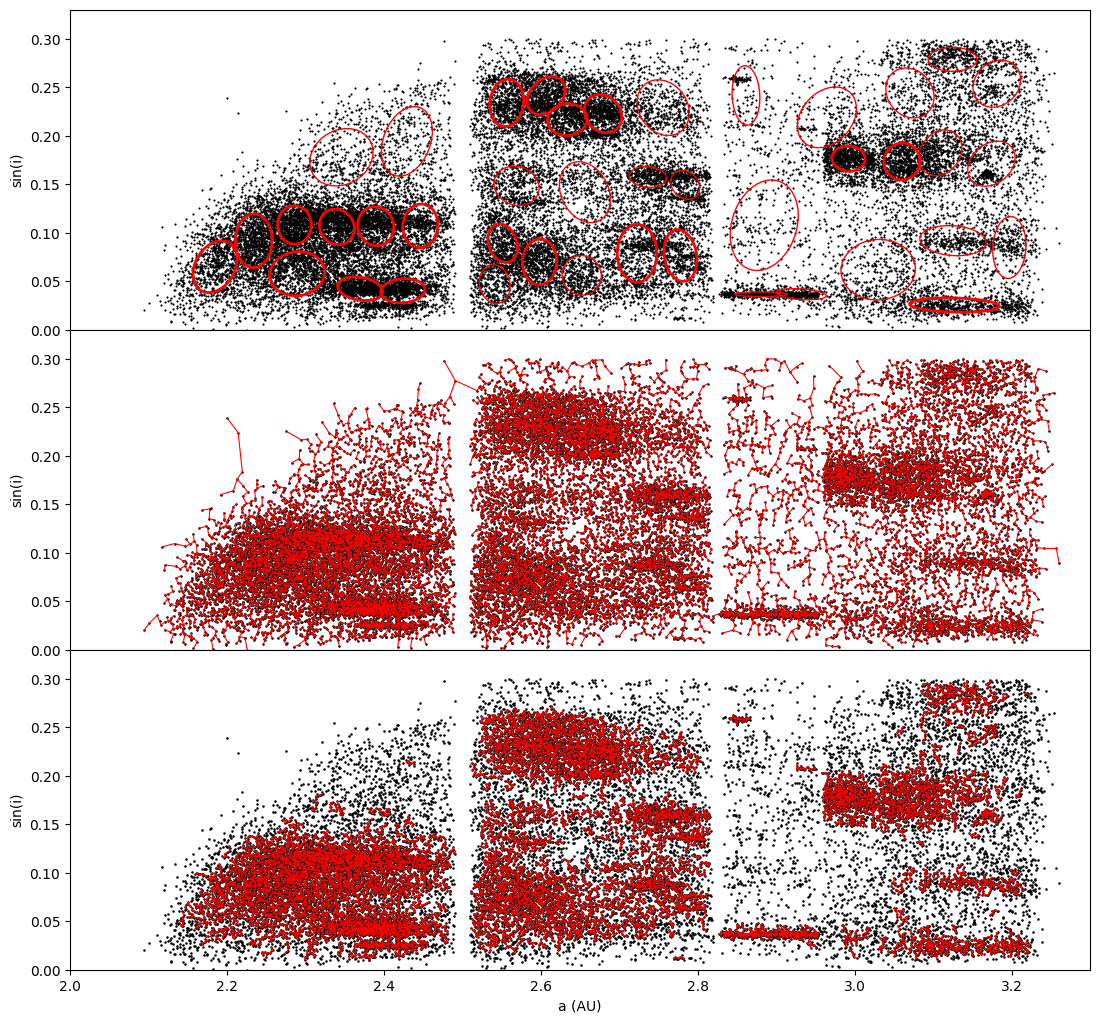

In [15]:
#------------------------------------------------------------
# Plot the results
xmin, xmax = (2.0, 3.3)
ymin, ymax = (0.0, 0.33)
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0, left=0.1, right=0.95, bottom=0.1, top=0.9)

ax = fig.add_subplot(311)
ax.scatter(X[:, 0], X[:, 1], s=1, lw=0.5, c='k')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('sin(i)')
# GMM comparison
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    # the 20 most numerous clusters in blue
    if (cnt<20):
        draw_ellipse(mu, C, scales=[1.0], ax=ax, fc='none', lw=2.0, ec='red')
    else:
        draw_ellipse(mu, C, scales=[1.0], ax=ax, fc='none', lw=1.0, ec='red')

ax = fig.add_subplot(312)
ax.scatter(X[:, 0], X[:, 1], s=1, lw=0.8, c='k')
ax.plot(T_x, T_y, c='red', lw=0.8)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('sin(i)')

ax = fig.add_subplot(313)
ax.scatter(X[:, 0], X[:, 1], s=1, lw=0.8, c='k')
ax.plot(T_trunc_x, T_trunc_y, c='red', lw=0.8)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('a (AU)')
ax.set_ylabel('sin(i)')
        
plt.show()

### What do you conclude about these results? How do they compare to GMM results? 

#### Note: we could now, on per object basis, compare the two classifications into background and clustered objects and somehow (depending on application) combine them into the final classification. 


## let's do kernel density estimate for completeness

In [173]:
# define plot_figure to plot all KDE figures with the same format.
def plot_figure(data, norm='linear'):
    fig = plt.figure(figsize=(9,9))
    fig.subplots_adjust(hspace=0, left=0.1, right=0.95, bottom=0.1, top=0.9)
    ax = fig.add_subplot(111) 
    ax.imshow(data.T, origin='lower', norm=norm, 
               extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.jet)
    ax.set_ylim(xmin, xmax)
    ax.set_xlim(ymin, ymax) 

In [181]:
# Create the grid on which to evaluate the results
Nx = 200
Ny = 100
xmin, xmax = (2.0, 3.3)
ymin, ymax = (0, 0.31)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

# evaluate Gaussian kernel
BW = 0.003
def estimate_kde(ker):
    kde = KernelDensity(bandwidth=BW, kernel='gaussian')
    log_dens = kde.fit(X).score_samples(Xgrid)
    dens = X.shape[0] * np.exp(log_dens).reshape((Ny, Nx))
    return dens
   
dens1 = estimate_kde('gaussian')

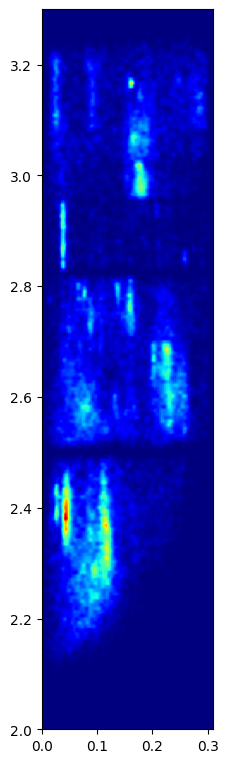

In [182]:
# plot kde map
plot_figure(dens1, norm='linear')

## What is the main downside of this method for finding clusters?

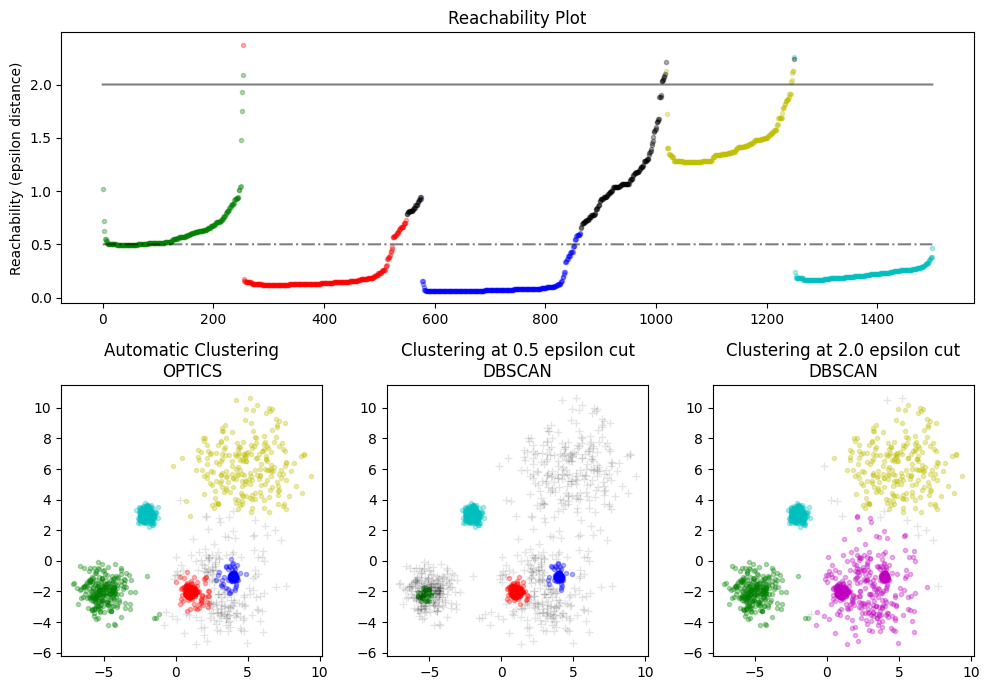

In [206]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()